In [34]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
train=pd.read_csv("knntrainout (4).csv")
test=pd.read_csv("knntestout (5).csv")

In [4]:
#Filling the missing prices in train file

for i in np.argwhere(np.isnan(np.array(train["price"]))):
    
    for j in np.argwhere(np.array(train["product_id"]) ==np.array(train["product_id"][i])):
        if np.array(train["discount"])[j]==0 and np.isnan(np.array(train["price"])[j]) == False:
           price_0 = np.array(train["price"])[j]
           discount_real =  train["discount"][i]
           real_price = price_0- discount_real*price_0
           train["price"][i]=real_price
        elif np.array(train["discount"])[j]!=0 and np.isnan(np.array(train["price"])[j]) == False:
            price_0 =  np.array(train["price"])[j]/np.array(train["discount"])[j]
            discount_real =  train["discount"][i]
            real_price = price_0- discount_real*price_0
            train["price"][i]=real_price
        else: 
          
            continue

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [5]:
#Filling the missing prices in test file

for i in np.argwhere(np.isnan(np.array(test["price"]))):
    
    for j in np.argwhere(np.array(test["product_id"]) ==np.array(test["product_id"][i])):
        if np.array(test["discount"])[j]==0 and np.isnan(np.array(test["price"])[j]) == False:
           price_0 = np.array(test["price"])[j]
           discount_real =  test["discount"][i]
           real_price = price_0- discount_real*price_0
           test["price"][i]=real_price
        elif np.array(test["discount"])[j]!=0 and np.isnan(np.array(test["price"])[j]) == False:
            price_0 =  np.array(test["price"])[j]/np.array(test["discount"])[j]
            discount_real =  test["discount"][i]
            real_price = price_0- discount_real*price_0
            test["price"][i]=real_price
        else: 
          
            continue

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


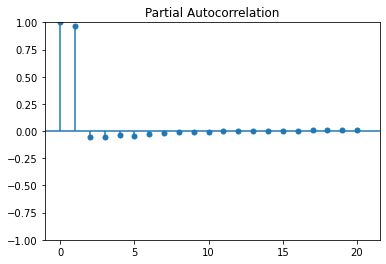

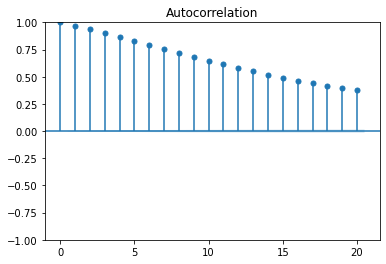

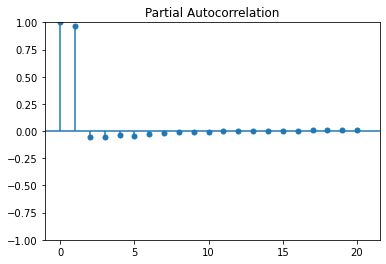

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train['store_count'], lags=20)
plot_pacf(train['store_count'], lags=20)

In [6]:
#Adding a 1-lag of store_count as feature 

data = train["store_count"][405291]
traincol =train["store_count"].shift(1)
train["lag_store"] = traincol
train = train.dropna()
testcol =test["store_count"].shift(1)
test["lag_store"] = testcol
test["lag_store"][0]=data

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [7]:
train.isna().sum()

Unnamed: 0                   0
product_id                   0
price                        0
discount                     0
sales_amount                 0
on_promotion                 0
store_count                  0
season                       0
main_promo                   0
seasonal_promo               0
general_promo                0
black_friday                 0
category_1                   0
category_2                   0
category_3                   0
color_type                   0
life_style                   0
fabric                       0
weight_of_fabric             0
neck_style                   0
form_type                    0
sleeve_type                  0
washing_style                0
fabric_type                  0
year                         0
month                        0
day                          0
weekofyear                   0
CocukBayrami                 0
CumhuriyetBayrami            0
GenclikBayrami               0
InternationalWomensDay       0
IsciBayr

In [8]:
test.isna().sum()

Unnamed: 0                   0
product_id                   0
price                        0
discount                     0
on_promotion                 0
store_count                  0
season                       0
main_promo                   0
seasonal_promo               0
general_promo                0
black_friday                 0
category_1                   0
category_2                   0
category_3                   0
color_type                   0
life_style                   0
fabric                       0
weight_of_fabric             0
neck_style                   0
form_type                    0
sleeve_type                  0
washing_style                0
fabric_type                  0
year                         0
month                        0
day                          0
weekofyear                   0
CocukBayrami                 0
CumhuriyetBayrami            0
GenclikBayrami               0
InternationalWomensDay       0
IsciBayrami                  0
KurbanAr

In [9]:
train=train.iloc[:,1:]
train.head()

,product_id,price,discount,sales_amount,on_promotion,store_count,season,main_promo,seasonal_promo,general_promo,...,VisuallyImpairedPeopleDay,WhitMonday,WhitSunday,YouthDay,fathers_day,mothers_day,new_years,new_years_eve,valentines_day,lag_store
1,21,221.47,0.0,100.0,1,85,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,85.0
2,21,221.47,0.0,127.0,1,85,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,85.0
3,21,221.47,0.0,89.0,1,84,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,85.0
4,21,221.47,0.0,124.0,1,85,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,84.0
5,21,221.47,0.0,168.0,1,87,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,85.0


In [10]:
test=test.iloc[:,1:]
test

,product_id,price,discount,on_promotion,store_count,season,main_promo,seasonal_promo,general_promo,black_friday,...,VisuallyImpairedPeopleDay,WhitMonday,WhitSunday,YouthDay,fathers_day,mothers_day,new_years,new_years_eve,valentines_day,lag_store
0,1,340.73,0.0000,1,260,-1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
1,1,340.73,0.0000,1,247,-1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,260.0
2,1,340.73,0.0000,1,260,-1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,247.0
3,1,340.73,0.0000,1,260,-1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,260.0
4,1,340.73,0.0000,1,260,-1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137635,7884,131.93,0.0001,1,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
137636,7884,131.93,0.0001,1,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
137637,7884,131.93,0.0001,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
137638,7884,131.93,0.0001,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [11]:
train['sin_week'] = np.sin((train.weekofyear-1)*(2.*np.pi/52))
train['sin_day'] = np.sin((train.year-1)*(2.*np.pi/365))

test['sin_week'] = np.sin((test.weekofyear-1)*(2.*np.pi/52))
test['sin_day'] = np.sin((test.year-1)*(2.*np.pi/365))

In [12]:
y_train = train["sales_amount"]
x_train = train.drop(columns = "sales_amount")

In [13]:
train.head()

,product_id,price,discount,sales_amount,on_promotion,store_count,season,main_promo,seasonal_promo,general_promo,...,WhitSunday,YouthDay,fathers_day,mothers_day,new_years,new_years_eve,valentines_day,lag_store,sin_week,sin_day
1,21,221.47,0.0,100.0,1,85,-1,3,0,0,...,0,0,0,0,0,0,0,85.0,-0.663123,-0.162807
2,21,221.47,0.0,127.0,1,85,-1,3,0,0,...,0,0,0,0,0,0,0,85.0,-0.748511,-0.162807
3,21,221.47,0.0,89.0,1,84,-1,3,0,0,...,0,0,0,0,0,0,0,85.0,-0.822984,-0.162807
4,21,221.47,0.0,124.0,1,85,-1,3,0,0,...,0,0,0,0,0,0,0,84.0,-0.885456,-0.162807
5,21,221.47,0.0,168.0,1,87,-1,3,0,0,...,0,0,0,0,0,0,0,85.0,-0.935016,-0.162807


In [14]:
test.head()

,product_id,price,discount,on_promotion,store_count,season,main_promo,seasonal_promo,general_promo,black_friday,...,WhitSunday,YouthDay,fathers_day,mothers_day,new_years,new_years_eve,valentines_day,lag_store,sin_week,sin_day
0,1,340.73,0.0,1,260,-1,3,0,0,0,...,0,0,0,0,0,0,0,9.0,-0.568065,-0.213521
1,1,340.73,0.0,1,247,-1,3,0,0,0,...,0,0,0,0,0,0,0,260.0,-0.663123,-0.213521
2,1,340.73,0.0,1,260,-1,3,0,0,0,...,0,0,0,0,0,0,0,247.0,-0.748511,-0.213521
3,1,340.73,0.0,1,260,-1,3,0,0,0,...,0,0,0,0,0,0,0,260.0,-0.822984,-0.213521
4,1,340.73,0.0,1,260,-1,3,0,0,0,...,0,0,0,0,0,0,0,260.0,-0.885456,-0.213521


In [15]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(train["sales_amount"].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -34.148181
p-value: 0.000000


# Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

randomforest = RandomForestRegressor()
randomforest.fit(x_train,y_train)
rfpredi = randomforest.predict(test)


In [18]:
rfpredi_train = randomforest.predict(x_train)


In [19]:
#training score
r2_score(rfpredi_train,y_train)

0.9843055633194404

In [20]:

mean_squared_log_error(rfpredi_train,y_train)

0.08360282280097392

In [21]:
rfpredi2=[]
for i in rfpredi:
    rfpredi2.append(int(i+0.5))
pred = pd.DataFrame(rfpredi2)
pred.columns=["sales_amount"]
pred.index = pred.index+1

In [22]:
pred.to_csv("Submission_DAC_6.csv")

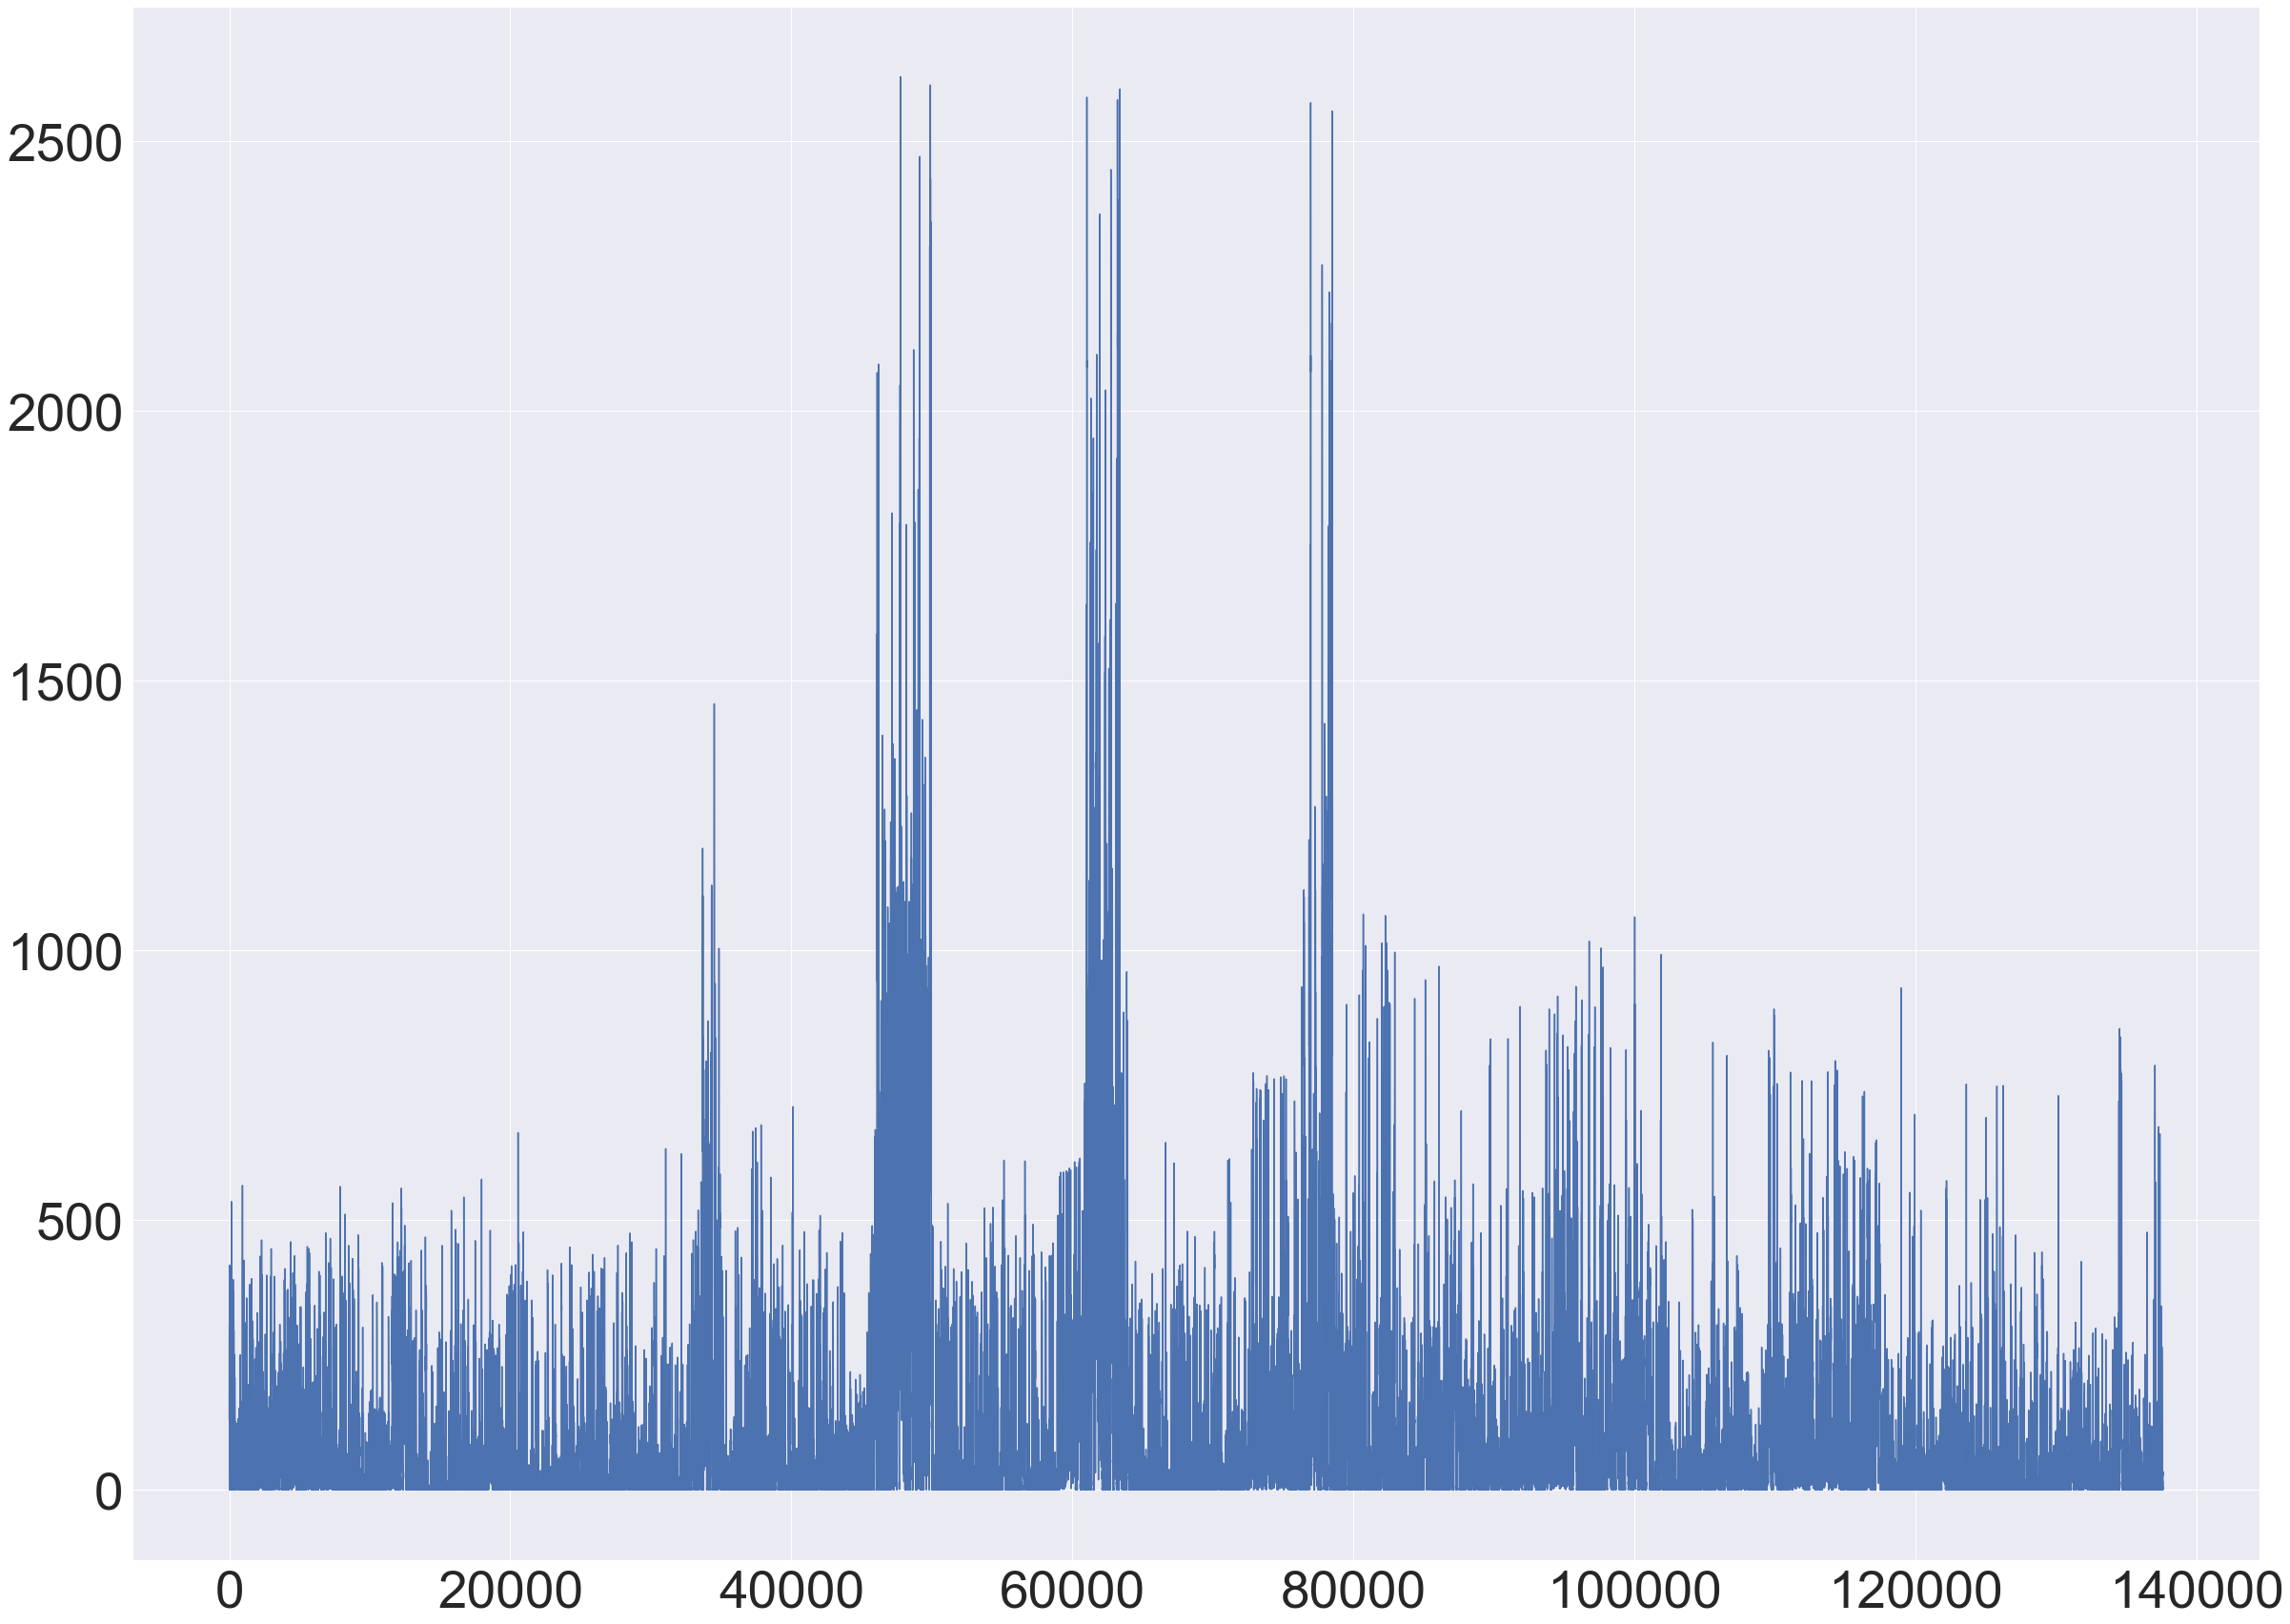

In [47]:
f, ax = plt.subplots(figsize=(40, 30))

plt.plot(rfpredi)

In [24]:
train_new = train.iloc[:355875]
xtrain = train_new.drop(columns="sales_amount")
ytrain= train_new["sales_amount"]
test_new = train.iloc[355875:]
xtest = test_new.drop(columns="sales_amount")
ytest= test_new["sales_amount"]

In [25]:
randomforest3 = RandomForestRegressor()
randomforest3.fit(xtrain,ytrain)
rfpredi_new = randomforest3.predict(xtest)
rfpredi_new_train = randomforest3.predict(xtrain)

In [27]:
mean_squared_log_error(rfpredi_new_train,ytrain)

0.08719148094654433

In [29]:
mean_squared_log_error(rfpredi_new,ytest)

1.078079504782177

In [30]:
r2_score(rfpredi_new,ytest)

0.5678155279654714

# Feature Importance Map

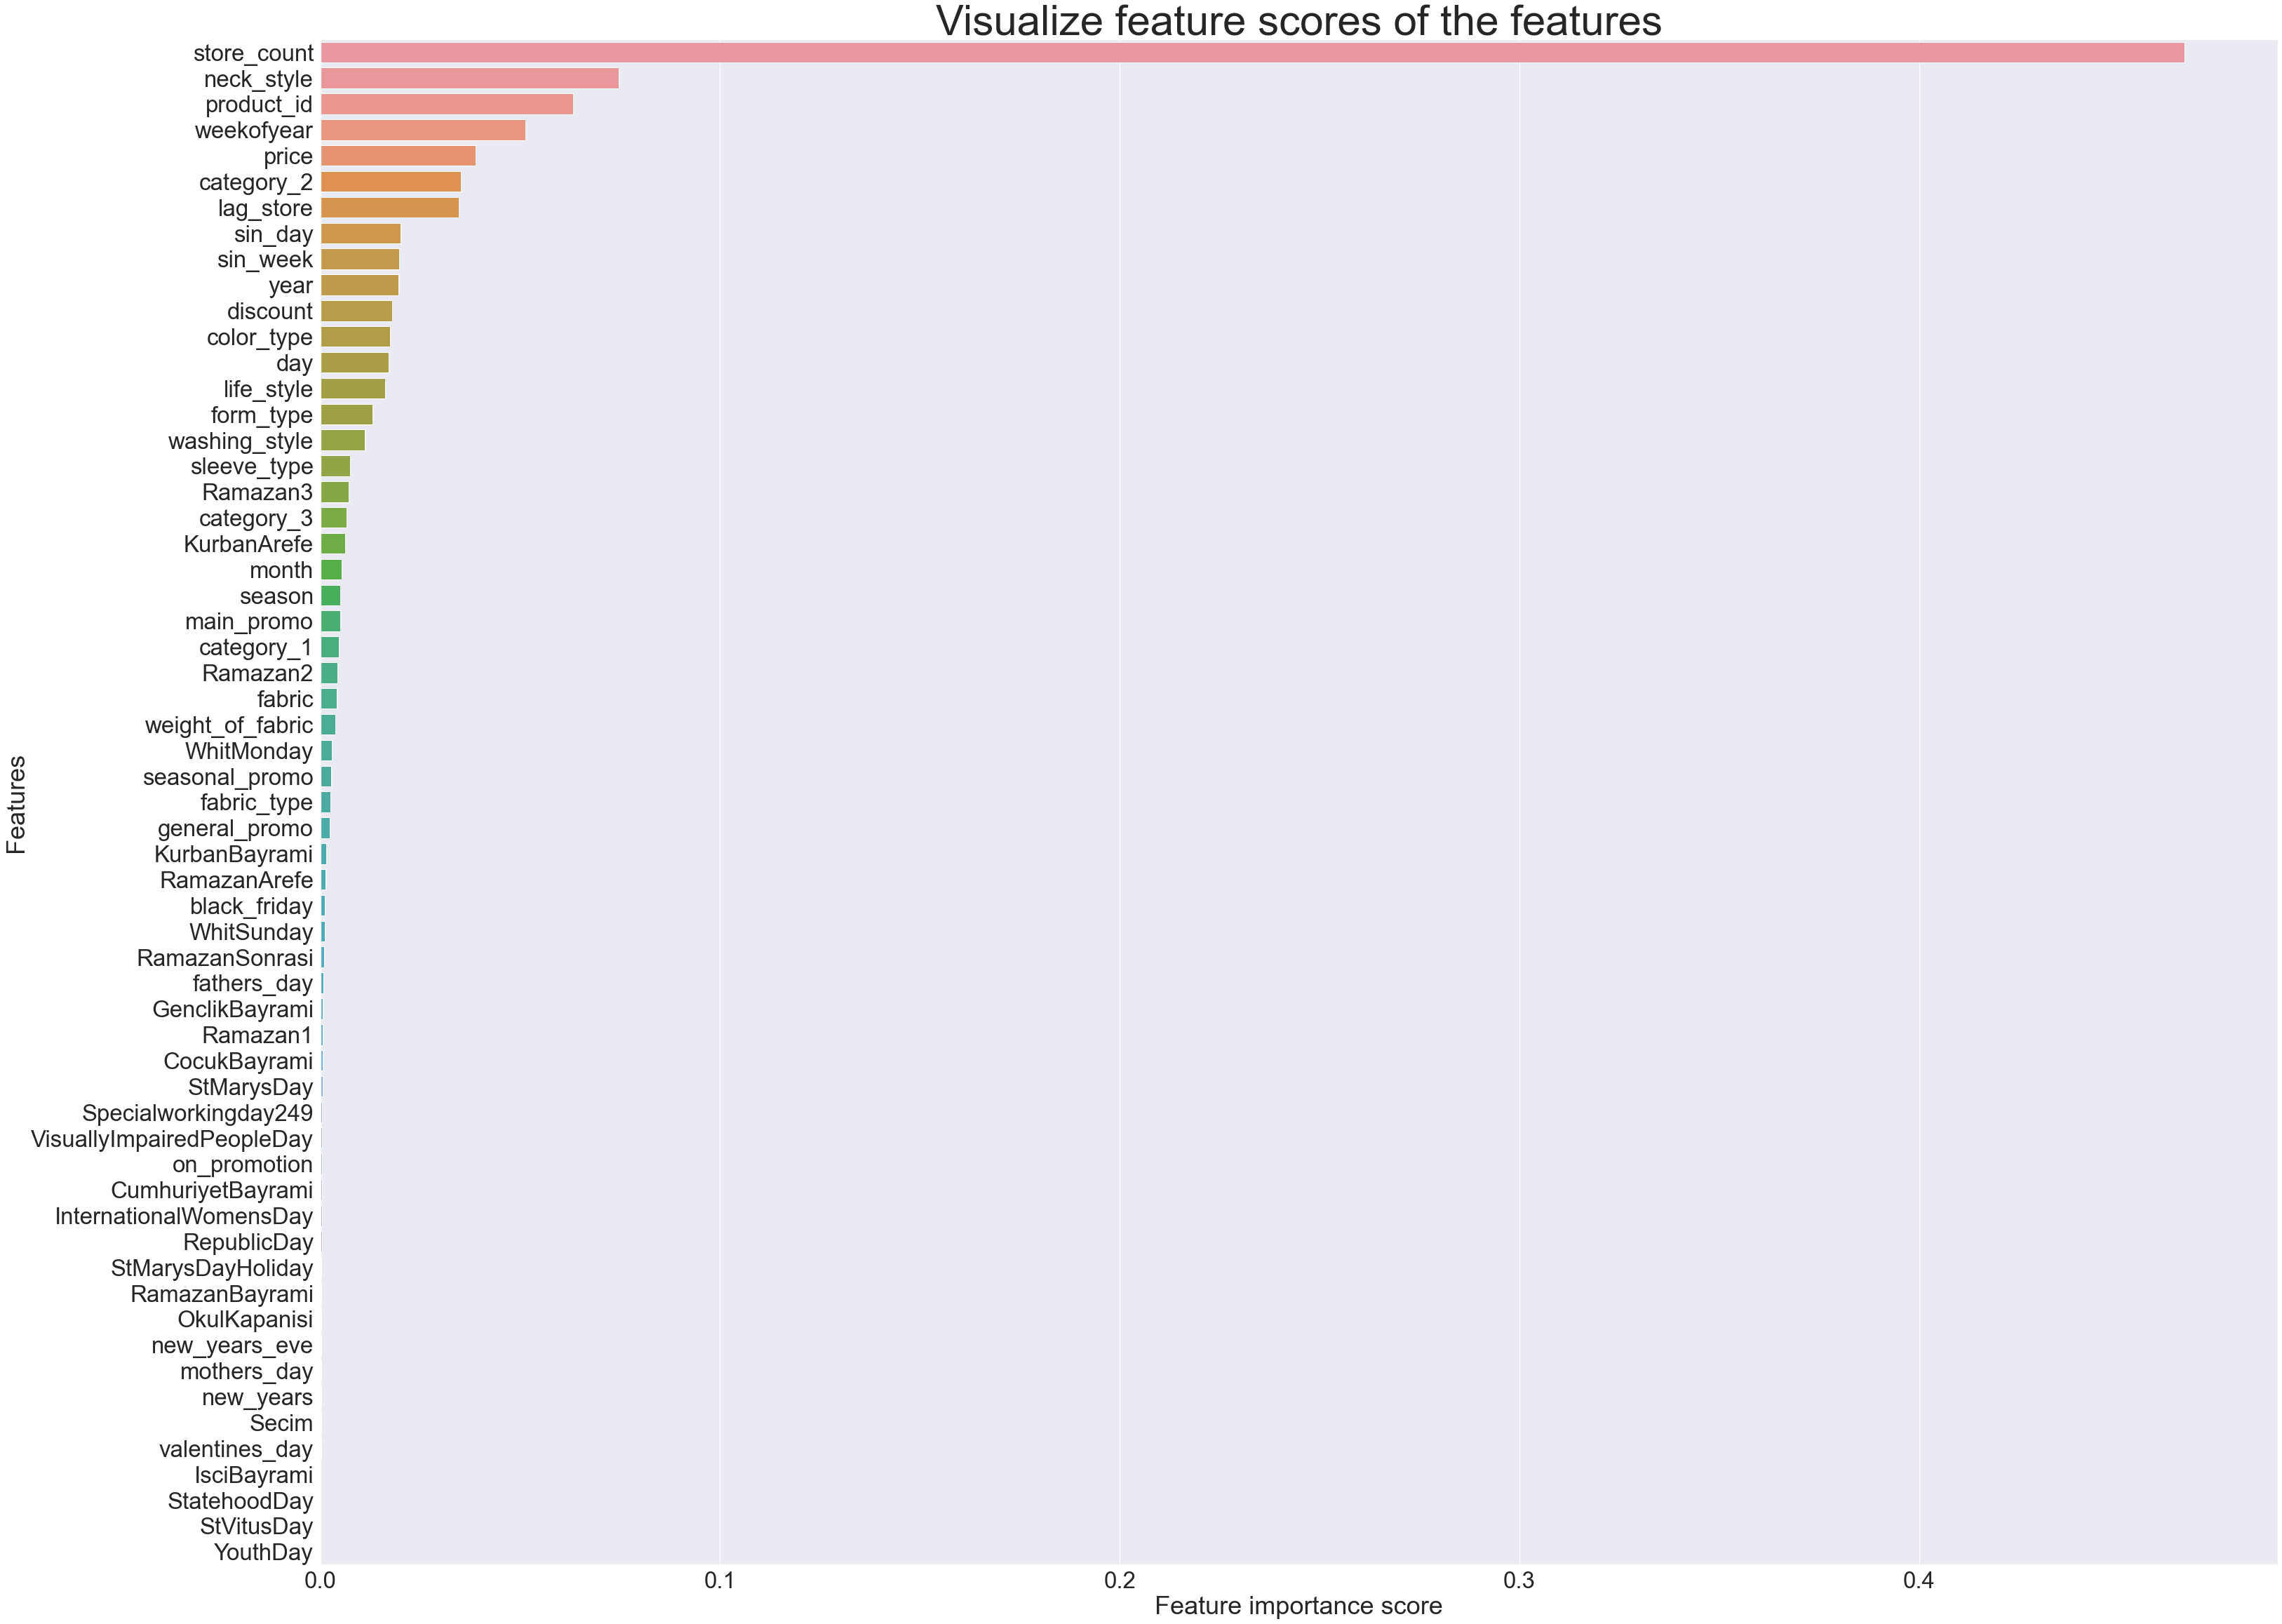

In [40]:
import seaborn as sns
feature_scores = pd.Series(randomforest.feature_importances_, index=x_train.columns).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(50, 40))
sns.set(font_scale = 5)
ax = sns.barplot(x=feature_scores, y=feature_scores.index)

ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
sns.set(font_scale = 3)

plt.show()

In [41]:
train_nw = train.iloc[:,:30]
train_nw.head()

,product_id,price,discount,sales_amount,on_promotion,store_count,season,main_promo,seasonal_promo,general_promo,...,sleeve_type,washing_style,fabric_type,year,month,day,weekofyear,CocukBayrami,CumhuriyetBayrami,GenclikBayrami
1,21,221.47,0.0,100.0,1,85,-1,3,0,0,...,1,2,6,2018,8,13,33,0,0,0
2,21,221.47,0.0,127.0,1,85,-1,3,0,0,...,1,2,6,2018,8,20,34,0,0,0
3,21,221.47,0.0,89.0,1,84,-1,3,0,0,...,1,2,6,2018,8,27,35,0,0,0
4,21,221.47,0.0,124.0,1,85,-1,3,0,0,...,1,2,6,2018,9,3,36,0,0,0
5,21,221.47,0.0,168.0,1,87,-1,3,0,0,...,1,2,6,2018,9,10,37,0,0,0


In [42]:
xx_train = train_nw.drop(columns = "sales_amount")
yy_train = train_nw["sales_amount"]
test_new = test.iloc[:,:29]

In [43]:
randomforest_n = RandomForestRegressor()
randomforest_n.fit(xx_train,yy_train)
rfpredi_n = randomforest_n.predict(test_new)

In [44]:
rfpredi_train_n = randomforest_n.predict(xx_train)


In [45]:
mean_squared_log_error(rfpredi_train_n,yy_train)

0.07874898933552196

In [46]:
r2_score(rfpredi_train_n,yy_train)

0.9848654405736234

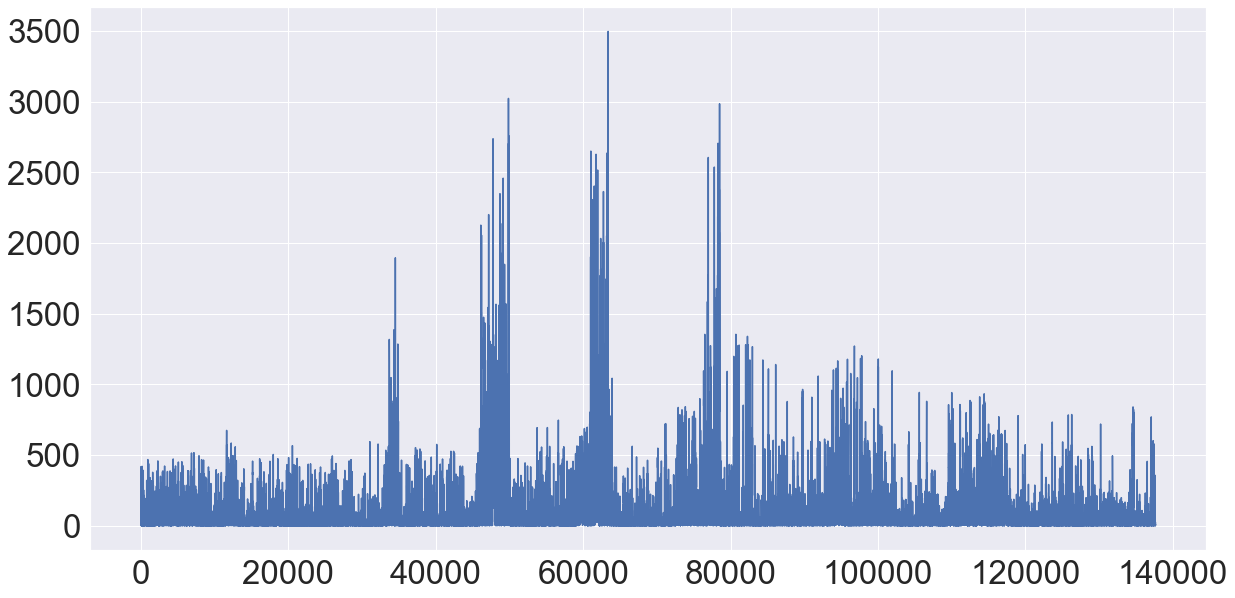

In [47]:

plt.figure(figsize=(20,10))
plt.plot(rfpredi_n)

# Grid Search 

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [100,200,500], 'max_features': [4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

grid_search = GridSearchCV(randomforest, param_grid, cv=3,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(x_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [100, 200, 500]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [82]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 500}

In [239]:
randomforest2 = RandomForestRegressor(max_features=8,n_estimators=500)
randomforest2.fit(x_train,y_train)
rfpredi2 = randomforest2.predict(test)
rfpredi2_train = randomforest2.predict(x_train)


In [240]:
r2_score(rfpredi2_train,y_train)

0.9822931949370602

In [241]:
mean_squared_log_error(rfpredi2_train,y_train)

0.13082058834458815

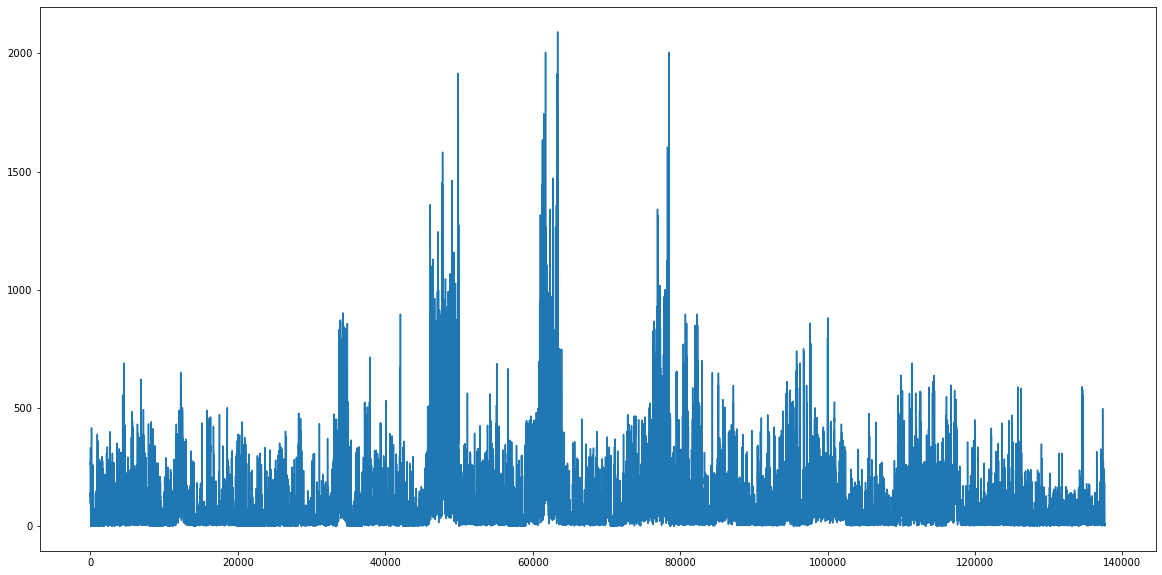

In [85]:
plt.figure(figsize=(20,10))
plt.plot(rfpredi)

In [98]:
pred = pd.DataFrame(rfpredi)
pred.columns=["sales_amount"]
pred.index = pred.index+1

In [99]:
 pred

,sales_amount
1,138.508000
2,96.300000
3,128.445333
4,137.049333
5,164.762000
...,...
137636,7.964000
137637,8.062000
137638,9.456000
137639,8.952000
